## Goal of this notebook

In this notebook, i will attempt to fit a geodesic in the space of curves using the $F_{ab}$ function in http://arxiv.org/abs/1803.10894. This function gives us the ability to take a curve (for example, the outline of a cell shape) in the "space of curves" and transform it to "q-space". This is advantageous for us because "q-space" is a two dimensional flat euclidean space. Thus, if we transform the data into q space, then we can fit that data using a line (which is a geodesic in q space). If we want to make predictions about future data points in the "space of curves" then we can extrapolate the data in "q-space" using the line, and then we can transform that extrapolated data back into the "space of curves" using the inverse F transform. 

This is how we will fit/extrapolate data in this notebook. I will fit both synthetic and real datasets. 

## Metric used: Elastic Metric

I will be using the elastic metric to perform calculations on the "space of curves" (a manifold). The elastic metric is a good choice of metric for "curve space" analysis for several reasons:

1. It separates points on a manifold based on the amount of "bending/rigidity" or "stretching/tension" that exists between two curves. This provides a method of separating/placing curves on the manifold which is intuitive (intuitive is always good).
2. The elastic metric has two parameters: the "bending" parameter $b$ and the "stretching" parameter $a$. These parameters can be easily changed to tweak the metric.  When $a$ is large, then two curves that differ by a stretching operation will be far apart. When $b$ is large, two curves that differ by a bending operation wil be far apart.

I will repeat analysis for the synthetic and real datasets for several different elastic metric parameters $a$ and $b$.

# Begin dataset analysis:

In [7]:
#first, load relevant things:

import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs

#load discrete curves and R2 manifolds
from geomstats.geometry.discrete_curves import DiscreteCurves, R2

#specify the manifold that we are working on and give that manifold a metric (elastic metric)
#note that a and b are the parameters that we edit.
SPACE = DiscreteCurves(R2, a=1, b=1)
METRIC = SPACE.elastic_metric

# 1. Synthetic Datasets

In [36]:
#import synthetic datasets

import dyn.dyn.datasets.synthetic as synthetic

n_geodesics = 1
n_times = 10
n_points = 40

#creating our synthetic dataset
geods_square_rect = synthetic.geodesics_square_to_rectangle(
    n_geodesics=n_geodesics, n_times=n_times, n_points=n_points
)

## 1.1 getting familiar with the dataset array

In [37]:
# From synthetic.py: 
#geodesics = gs.zeros((n_geodesics, n_times, n_points, dim))
#n_geodesics is the number of geodesics we want to calculate
#n_times is the number of times (or rather, the shape at that time) we want to "sample" on each geodesic
#n_points is the number of points on the curve.
#dim is the dimension of the curve. (for example, a 2D curve has dim=2)

print(geods_square_rect.shape)

torch.Size([1, 10, 40, 2])


In [38]:
#printing the first geodesic at the first time. this is the list of all of the coordinates of each point on the curve.

print(geods_square_rect[0,0,:,:])

tensor([[-1.0694e+00, -1.0694e+00],
        [-8.5551e-01, -1.0694e+00],
        [-6.4164e-01, -1.0694e+00],
        [-4.2776e-01, -1.0694e+00],
        [-2.1388e-01, -1.0694e+00],
        [ 4.4703e-08, -1.0694e+00],
        [ 2.1388e-01, -1.0694e+00],
        [ 4.2776e-01, -1.0694e+00],
        [ 6.4164e-01, -1.0694e+00],
        [ 8.5551e-01, -1.0694e+00],
        [ 1.0694e+00, -1.0694e+00],
        [ 1.0694e+00, -8.5551e-01],
        [ 1.0694e+00, -6.4164e-01],
        [ 1.0694e+00, -4.2776e-01],
        [ 1.0694e+00, -2.1388e-01],
        [ 1.0694e+00,  4.4703e-08],
        [ 1.0694e+00,  2.1388e-01],
        [ 1.0694e+00,  4.2776e-01],
        [ 1.0694e+00,  6.4164e-01],
        [ 1.0694e+00,  8.5551e-01],
        [ 1.0694e+00,  1.0694e+00],
        [ 8.5551e-01,  1.0694e+00],
        [ 6.4164e-01,  1.0694e+00],
        [ 4.2776e-01,  1.0694e+00],
        [ 2.1388e-01,  1.0694e+00],
        [ 4.4703e-08,  1.0694e+00],
        [-2.1388e-01,  1.0694e+00],
        [-4.2776e-01,  1.069

In [39]:
from matplotlib import pyplot as plt

In [133]:
data =  geods_square_rect[0,0,:,:].numpy()
print(data.shape)

(40, 2)


In [129]:
geods_square_rect[0,0,:,0]

tensor([-1.0694e+00, -8.5551e-01, -6.4164e-01, -4.2776e-01, -2.1388e-01,
         4.4703e-08,  2.1388e-01,  4.2776e-01,  6.4164e-01,  8.5551e-01,
         1.0694e+00,  1.0694e+00,  1.0694e+00,  1.0694e+00,  1.0694e+00,
         1.0694e+00,  1.0694e+00,  1.0694e+00,  1.0694e+00,  1.0694e+00,
         1.0694e+00,  8.5551e-01,  6.4164e-01,  4.2776e-01,  2.1388e-01,
         4.4703e-08, -2.1388e-01, -4.2776e-01, -6.4164e-01, -8.5551e-01,
        -1.0694e+00, -1.0694e+00, -1.0694e+00, -1.0694e+00, -1.0694e+00,
        -1.0694e+00, -1.0694e+00, -1.0694e+00, -1.0694e+00, -1.0694e+00])

tensor([-1.0694e+00, -8.5551e-01, -6.4164e-01, -4.2776e-01, -2.1388e-01,
         4.4703e-08,  2.1388e-01,  4.2776e-01,  6.4164e-01,  8.5551e-01,
         1.0694e+00,  1.0694e+00,  1.0694e+00,  1.0694e+00,  1.0694e+00,
         1.0694e+00,  1.0694e+00,  1.0694e+00,  1.0694e+00,  1.0694e+00,
         1.0694e+00,  8.5551e-01,  6.4164e-01,  4.2776e-01,  2.1388e-01,
         4.4703e-08, -2.1388e-01, -4.2776e-01, -6.4164e-01, -8.5551e-01,
        -1.0694e+00, -1.0694e+00, -1.0694e+00, -1.0694e+00, -1.0694e+00,
        -1.0694e+00, -1.0694e+00, -1.0694e+00, -1.0694e+00, -1.0694e+00])


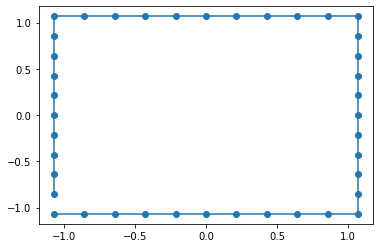

In [103]:
#how to plot the square
plt.plot(geods_square_rect[0,0,:,0], geods_square_rect[0,0,:,1],marker="o")

## 1.2 Transform the dataset of curves (c1,..., cT) into their corresponding "q's" using `f_transform`.

In [221]:
#first, we must import the elastic metric class because that is where the f transform is located
from geomstats.geometry.discrete_curves import ElasticMetric
import numpy as np

# this is creating (aka "instantiating") an object elastic_metric of the class ElasticMetric
elastic_metric = ElasticMetric(a=1, b=1, ambient_manifold=R2)  

#selecting the first (and only) geodesic
#geodesic = geods_square_rect[0]

q_tensor = elastic_metric.f_transform(geods_square_rect[0])

"""
#this is the longer version of the line above:

#this creates a list of q tensors
q_tensor_list=[]

for i_time in range(n_times):
    #selecting the shape at a single "time" in the geodesic
    #curve= geodesic[i_time]
    curve= geods_square_rect[0,i_time,:,:]
    #print(curve)
    #must keep curve as a tensor for now becaue that is what f_transform expects
    q_tensor_list.append(elastic_metric.f_transform(curve))
    #print(elastic_metric.f_transform(curve))

#at this point, q_tensor_list is a list of transformed tensors.
#we want to convert the tensors into arrays, which we can deal with more easily
q_list=[]
for i_time in range(n_times):
    q_list.append(np.array(q_tensor_list[i_time]))

#now, we want to convert the list of arrays into an array of arrays (3D array)
q=np.array(q_list)

#look, it worked. Note that this dimension is correct.
#the number of points should go from 40 -> 39 because in f_transform, we calculate the 
#"velocity" which has to do with the space between points, and q is related to this velcity.

"""
q=np.array(q_tensor)
print(q)

[[[ 5.7762504e+00  0.0000000e+00]
  [ 5.7762504e+00  0.0000000e+00]
  [ 5.7762494e+00  0.0000000e+00]
  [ 5.7762504e+00  0.0000000e+00]
  [ 5.7762499e+00  0.0000000e+00]
  [ 5.7762499e+00  0.0000000e+00]
  [ 5.7762499e+00  0.0000000e+00]
  [ 5.7762504e+00  0.0000000e+00]
  [ 5.7762504e+00  0.0000000e+00]
  [ 5.7762504e+00  0.0000000e+00]
  [ 4.0844259e+00  4.0844259e+00]
  [ 4.0844259e+00  4.0844259e+00]
  [ 4.0844250e+00  4.0844250e+00]
  [ 4.0844259e+00  4.0844259e+00]
  [ 4.0844254e+00  4.0844254e+00]
  [ 4.0844254e+00  4.0844254e+00]
  [ 4.0844254e+00  4.0844254e+00]
  [ 4.0844259e+00  4.0844259e+00]
  [ 4.0844259e+00  4.0844259e+00]
  [ 4.0844259e+00  4.0844259e+00]
  [-2.5248792e-07  5.7762504e+00]
  [-2.5248792e-07  5.7762504e+00]
  [-2.5248792e-07  5.7762504e+00]
  [-2.5248789e-07  5.7762499e+00]
  [-2.5248789e-07  5.7762499e+00]
  [-2.5248789e-07  5.7762499e+00]
  [-2.5248792e-07  5.7762504e+00]
  [-2.5248789e-07  5.7762494e+00]
  [-2.5248792e-07  5.7762504e+00]
  [-2.5248792e

## 1.3 Now, fit q1, …, qT with linear regression

In [203]:
#in order to do linear regression with the q's, we will have to re-shape q because linear regression expects
#something with a 1D shape. Therefore, we will create q_vector. 
#https://www.adamsmith.haus/python/answers/how-to-reshape-a-numpy-array-into-a-vector-in-python


"""
#we want to turn each of q1,...qT into a 1D array.
q_vector_list =[]
for i_times in range(n_times):
    q_vector_list.append(np.reshape(q[i_times], -1))
                         
                         
q_vector=np.array(q_vector_list)

"""

#this is much more efficient than the code above.
q_vector = q.reshape((n_times, -1))

#now, q_vector is a 2D array where the first column is times and the second column is a bunch of numbers
print(q_vector.shape)
#print(q_vector)

(10, 78)


In [217]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#create regression object
regr = linear_model.LinearRegression()

#Now, i need to create an array that only has the times
q_times_1d = gs.arange(0, n_times, 1)
q_times = np.reshape(q_times,(10,1))

"""
#this is wrong
q_times_list= []
for i_time in range(n_times):
    q_times_list.append([q_vector[i_time,0]])
q_times=np.array(q_times_list)
"""
print(q_times.shape)

regr.fit(q_times,q_vector)

torch.Size([10, 1])


LinearRegression()

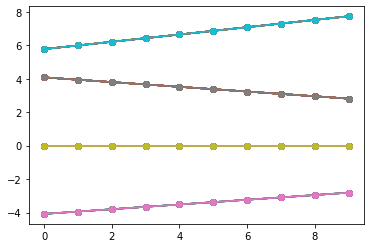

In [214]:
plt.plot( q_vector, marker = 'o')

## 1.4 Compute the estimated_q1, …., estimated_qT corresponding to the q1, …, qT

In [218]:
#compute estimated q predictions
q_vector_predict=regr.predict(q_times)
print(q_vector_predict)

[[ 5.77625038e+00  0.00000000e+00  5.77624999e+00  0.00000000e+00
   5.77624989e+00  0.00000000e+00  5.77624997e+00  0.00000000e+00
   5.77624990e+00  0.00000000e+00  5.77624990e+00  0.00000000e+00
   5.77625014e+00  0.00000000e+00  5.77625029e+00  0.00000000e+00
   5.77625004e+00  0.00000000e+00  5.77625015e+00  0.00000000e+00
   4.08442557e+00  4.08442557e+00  4.08442558e+00  4.08442558e+00
   4.08442504e+00  4.08442504e+00  4.08442563e+00  4.08442563e+00
   4.08442545e+00  4.08442545e+00  4.08442545e+00  4.08442545e+00
   4.08442525e+00  4.08442525e+00  4.08442574e+00  4.08442574e+00
   4.08442545e+00  4.08442545e+00  4.08442562e+00  4.08442562e+00
  -2.52487910e-07  5.77625015e+00 -2.52487905e-07  5.77625004e+00
  -2.52487920e-07  5.77625029e+00 -2.52487915e-07  5.77625014e+00
  -2.52487895e-07  5.77624990e+00 -2.52487895e-07  5.77624990e+00
  -2.52487897e-07  5.77624997e+00 -2.52487908e-07  5.77624989e+00
  -2.52487904e-07  5.77624999e+00 -2.52487923e-07  5.77625038e+00
  -4.08442

## 1.5 Inverse transform estimated_q1, …, estimated_qT into curves

In [222]:
#i should re-do this section in the more efficient way that nina suggested.
#first, we will have to de-compress the vector (turn it back into its original shape)
print(q_vector_predict.shape)
q_array_predict = np.reshape(q_vector_predict,(n_times,n_points-1,2))
print(q_array_predict.shape)

#now, we will transform the array back into a tensor so that f_transoform_inverse will accept it
import torch

q_tensor_predict= torch.from_numpy(q_array_predict)


(10, 78)
(10, 39, 2)


In [219]:
"""

#first, we will have to de-compress the vector (turn it back into its original shape)
print(q_vector_predict.shape)
q_array_predict = np.reshape(q_vector_predict,(n_times,n_points-1,2))
print(q_array_predict.shape)

#now, we will transform the array back into a tensor so that f_transoform_inverse will accept it
import torch

q_tensor_predict= []
#specifically, we want each of the arrays at i_time to be tensors.
for i_time in range(n_times):
    q_tensor_predict.append(torch.from_numpy(q_array_predict[i_time])) 
#print(q_tensor_predict)

(10, 78)
(10, 39, 2)


In [234]:
starting_point = gs.array([0., 0.])
starting_point_array = gs.zeros((n_times, 2))

predicted_curves=elastic_metric.f_transform_inverse(q_tensor_predict,starting_point_array)
print(predicted_curves)

tensor([[[ 0.0000e+00,  0.0000e+00],
         [ 2.1388e-01,  0.0000e+00],
         [ 4.2776e-01,  0.0000e+00],
         [ 6.4164e-01,  0.0000e+00],
         [ 8.5551e-01,  0.0000e+00],
         [ 1.0694e+00,  0.0000e+00],
         [ 1.2833e+00,  0.0000e+00],
         [ 1.4972e+00,  0.0000e+00],
         [ 1.7110e+00,  0.0000e+00],
         [ 1.9249e+00,  0.0000e+00],
         [ 2.1388e+00,  0.0000e+00],
         [ 2.1388e+00,  2.1388e-01],
         [ 2.1388e+00,  4.2776e-01],
         [ 2.1388e+00,  6.4164e-01],
         [ 2.1388e+00,  8.5551e-01],
         [ 2.1388e+00,  1.0694e+00],
         [ 2.1388e+00,  1.2833e+00],
         [ 2.1388e+00,  1.4972e+00],
         [ 2.1388e+00,  1.7110e+00],
         [ 2.1388e+00,  1.9249e+00],
         [ 2.1388e+00,  2.1388e+00],
         [ 1.9249e+00,  2.1388e+00],
         [ 1.7110e+00,  2.1388e+00],
         [ 1.4972e+00,  2.1388e+00],
         [ 1.2833e+00,  2.1388e+00],
         [ 1.0694e+00,  2.1388e+00],
         [ 8.5551e-01,  2.1388e+00],
 

In [239]:
"""
curve_predicted_list=[]
for i_time in range(n_times):
    tensor_form=elastic_metric.f_transform_inverse(q_tensor_predict[i_time,:,:],starting_point)
    array_form=np.array(tensor_form)
    curve_predicted_list.append(array_form)
curve_predicted=np.array(curve_predicted_list)
curve_predicted_tensor = torch.from_numpy(curve_predicted)
print(curve_predicted_tensor)
"""

'\ncurve_predicted_list=[]\nfor i_time in range(n_times):\n    tensor_form=elastic_metric.f_transform_inverse(q_tensor_predict[i_time,:,:],starting_point)\n    array_form=np.array(tensor_form)\n    curve_predicted_list.append(array_form)\ncurve_predicted=np.array(curve_predicted_list)\ncurve_predicted_tensor = torch.from_numpy(curve_predicted)\nprint(curve_predicted_tensor)\n'

## 1.6 See whether predicted curves are close to original curves

In [240]:
#first, i will create a new array, where one of the geodesics is the original geodesic and the other geodesic
#is the predicted geodesic.

geodesic_array= np.array([geods_square_rect[0],predicted_curves])

/var/folders/yw/6dl955ps7fj9ysnf7qh0j4tc0000gn/T/ipykernel_764/4214073001.py:4: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  geodesic_array= np.array([geods_square_rect[0],predicted_curves])
/var/folders/yw/6dl955ps7fj9ysnf7qh0j4tc0000gn/T/ipykernel_764/4214073001.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  geodesic_array= np.array([geods_square_rect[0],pre

now, i will use code from "explore synthetic datasets" to plot them

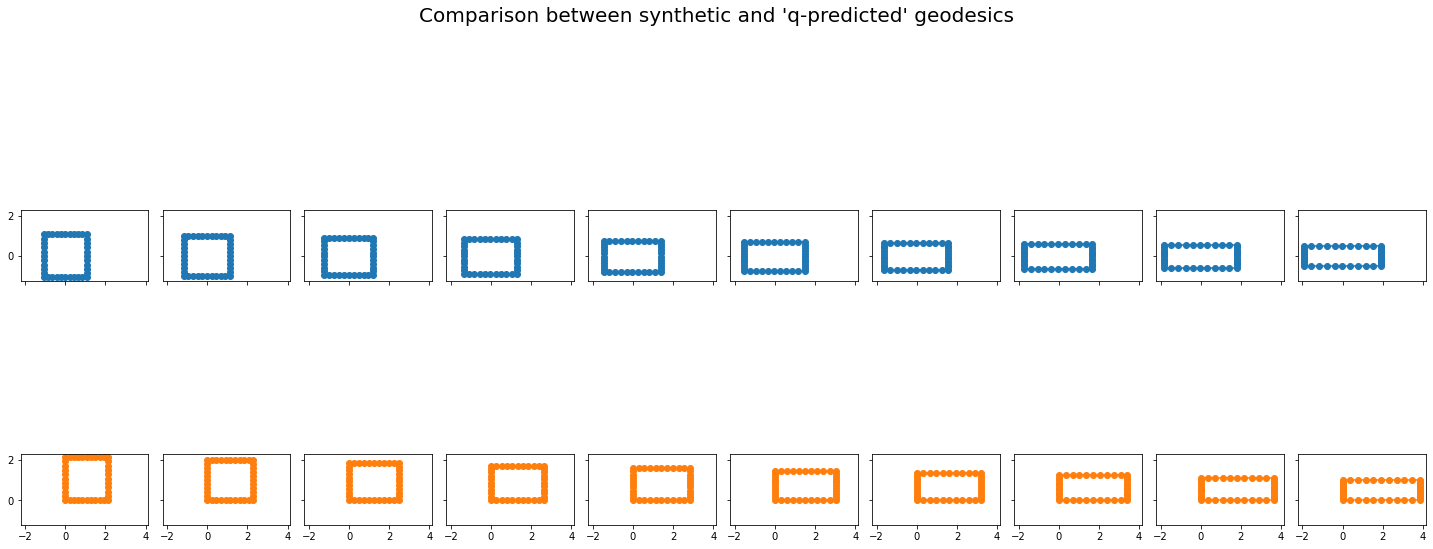

In [241]:
import matplotlib.pyplot as plt

n_geodesics=2
fig, axes = plt.subplots(
    n_geodesics, n_times, figsize=(20, 10), sharex=True, sharey=True
)
fig.suptitle("Comparison between synthetic and 'q-predicted' geodesics", fontsize=20)

for i_geodesic in range(n_geodesics):
    curve = geodesic_array[i_geodesic]
    for i_time in range(n_times):
        axes[i_geodesic, i_time].plot(
            curve[i_time][:, 0], curve[i_time][:, 1], marker="o", c=f"C{i_geodesic}"
        )
        axes[i_geodesic, i_time].set_aspect("equal")
plt.tight_layout()

idea: plot them in an overlay

Note to self, if these predict that they follow geodesics, mix things up by splitting the dataset up like in the example: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html